In [209]:
import numpy as np
import matplotlib.pyplot as plt


param_str = 'TZVP'
cosmo_inp = f'isotherms/{param_str}/'
data_inp = '../experimental/isotherms/'

hfc_vec = ['R32', 'R134a', 'R125']
fes_vec = ['c2mim_hdfs_pfpa', 'tba_nfs_pfpa']

T = 313.15
rdes_vec = [0.5, 1, 2]

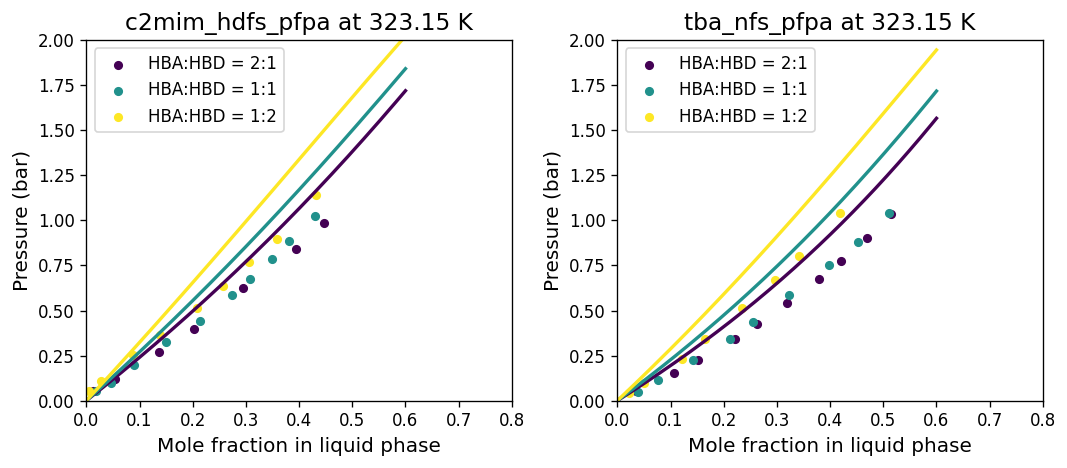

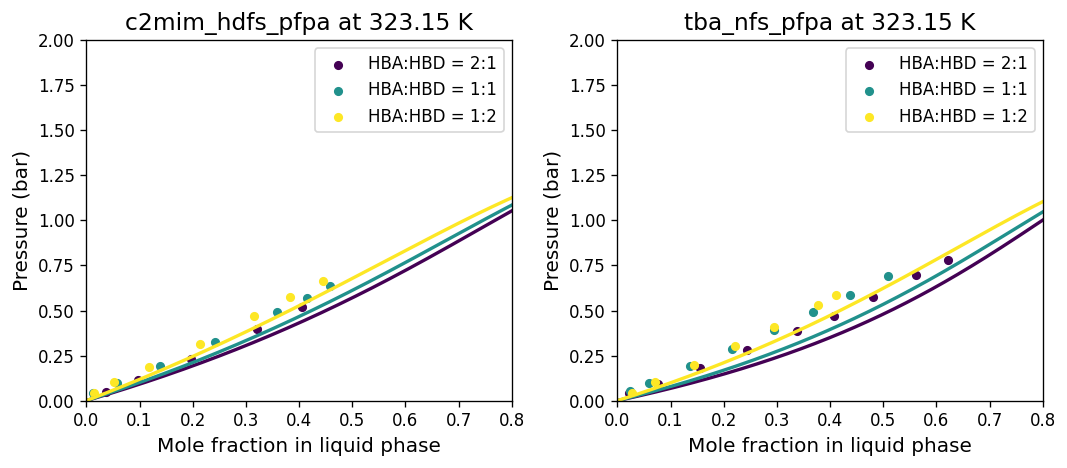

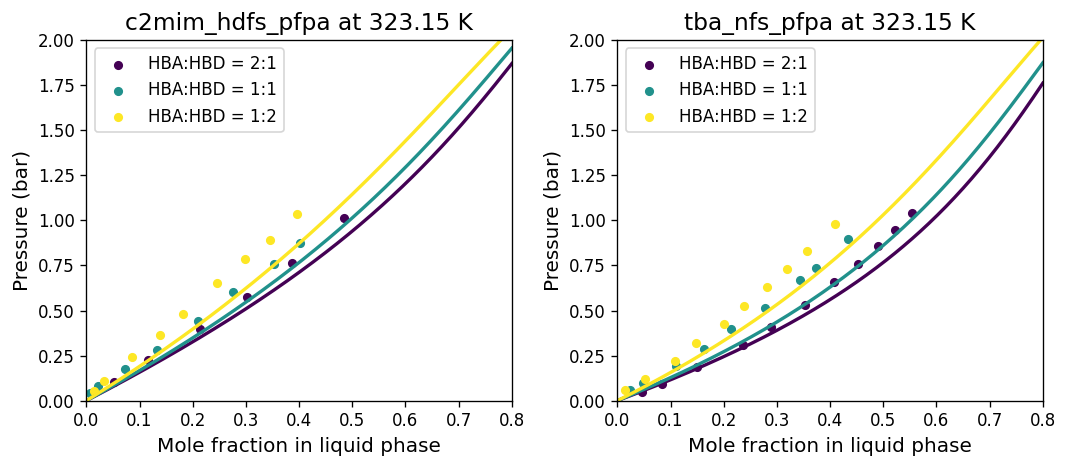

In [216]:
for i,hfc in enumerate(hfc_vec):
    plt.figure(figsize=(9,4), dpi=120)
    for j,fes in enumerate(fes_vec):
        plt.subplot(1,2,j+1)
        for k,rdes in enumerate(rdes_vec):
            x1_csmo, P_csmo = np.loadtxt(cosmo_inp+f'{hfc}+{fes}[1_{rdes}]-{T}K.out', unpack=True, comments='#')
            if fes != 'tbp_br_pfpa':
                if rdes == 0.5:
                    T_exp, x1_exp, P_exp = np.loadtxt(data_inp+f'{hfc}+{fes}[2_1].txt', unpack=True, comments='#')
                    x1_exp, P_exp = x1_exp[T_exp==T], P_exp[T_exp==T]
                    label = 'HBA:HBD = 2:1'
                else:
                    T_exp, x1_exp, P_exp = np.loadtxt(data_inp+f'{hfc}+{fes}[1_{rdes}].txt', unpack=True, comments='#')
                    x1_exp, P_exp = x1_exp[T_exp==T], P_exp[T_exp==T]
                    label = f'HBA:HBD = {1}:{rdes}'
            else:
                x1_exp, P_exp = np.array([np.nan]), np.array([np.nan])
            plt.plot(x1_csmo, P_csmo, color=plt.cm.viridis(np.linspace(0,1,3)[k]), linewidth=2)
            plt.scatter(x1_exp, P_exp, color=plt.cm.viridis(np.linspace(0,1,3)[k]), s=20, label=label)
        plt.title(f'{fes} at {T} K', fontsize=14)
        plt.xlabel('Mole fraction in liquid phase', fontsize=12)
        plt.ylabel('Pressure (bar)', fontsize=12)
        plt.xlim(0,.8), plt.ylim(0,2)
        plt.legend()
    plt.tight_layout()
    plt.show()

In [213]:
T_vec = [303.15, 313.15, 323.15]

x1_exp, x1_csmo = [], []
for i,T in enumerate(T_vec):
    x1_exp_T, x1_csmo_T = [], []
    for j,hfc in enumerate(hfc_vec):
        x1_exp_hfc, x1_csmo_hfc = [], []
        for k,fes in enumerate(fes_vec):
            x1_exp_fes, x1_csmo_fes = [], []
            for l,rdes in enumerate(rdes_vec):
                fes_str = f'{fes}[1_{rdes}]' if rdes != 0.5 else f'{fes}[2_1]'
                T_exp_vec, x1_exp_vec, p_exp_vec = np.loadtxt(data_inp+f'{hfc}+{fes_str}.txt', unpack=True, comments='#')
                x1_exp_vec, p_exp_vec = x1_exp_vec[T_exp_vec==T], p_exp_vec[T_exp_vec==T]
                x1_csmo_vec, p_csmo_vec = np.loadtxt(cosmo_inp+f'{hfc}+{fes}[1_{rdes}]-{T}K.out', unpack=True, comments='#')
                for m,p in enumerate(p_exp_vec):
                    x1_exp_fes.append(float(x1_exp_vec[m]))
                    ndx = np.argmin(np.abs(p_csmo_vec - p))
                    try:
                        if p > p_csmo_vec[ndx]:
                            x1_csmo_fes.append(float(np.interp(p, np.array([p_csmo_vec[ndx], p_csmo_vec[ndx+1]]), np.array([x1_csmo_vec[ndx], x1_csmo_vec[ndx+1]]))))
                        else:
                            x1_csmo_fes.append(float(np.interp(p, np.array([p_csmo_vec[ndx-1], p_csmo_vec[ndx]]), np.array([x1_csmo_vec[ndx-1], x1_csmo_vec[ndx]]))))
                    except:
                        print(f'Skipping point: {hfc}+{fes_str} at {T} K and P={p} bar, x1_exp={x1_exp_vec[i]}')
                        x1_csmo_fes.append(np.nan)
            x1_exp_hfc.append(x1_exp_fes), x1_csmo_hfc.append(x1_csmo_fes)
        x1_exp_T.append(x1_exp_hfc), x1_csmo_T.append(x1_csmo_hfc)
    x1_exp.append(x1_exp_T), x1_csmo.append(x1_csmo_T)

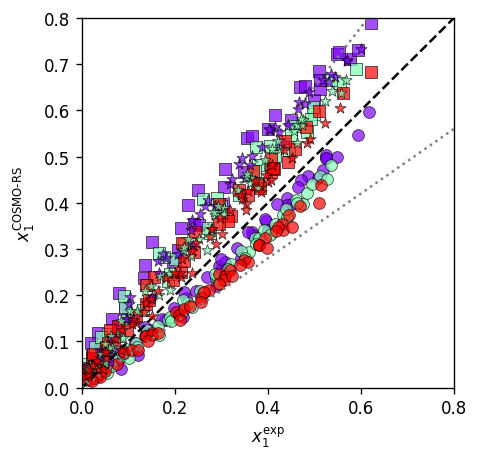

In [ ]:
plt.figure(figsize=(4,4), dpi=120)
for i, T in enumerate(T_vec):
    for j, hfc in enumerate(hfc_vec):
        for k, fes in enumerate(fes_vec):
            plt.scatter(x1_exp[i][j][k], x1_csmo[i][j][k], 
                        color=plt.cm.rainbow(np.linspace(0, 1, len(T_vec)))[i], alpha=0.7, marker=['o', 's', '*'][j],
                        zorder = 1 if j==0 else (2 if j==1 else 3), s=50, edgecolor='black', linewidth=0.5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='y=x')
plt.plot([0, 1], [0, 1.3], color='gray', linestyle=':', label='30% error')
plt.plot([0, 1], [0, 0.7], color='gray', linestyle=':')
plt.xlabel(r'$x_{1}^{\text{exp}}$'), plt.ylabel(r'$x_{1}^{\text{COSMO-RS}}$')
plt.xlim(0, .8), plt.ylim(0, .8)
plt.show()

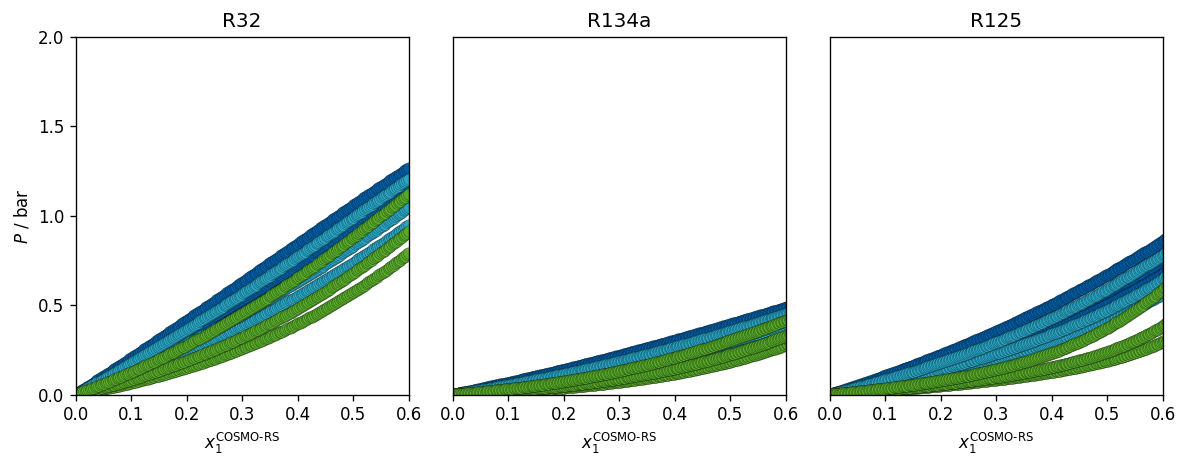

In [262]:
colors = ['#005da4', '#29a4c3', '#57aa29']
fes_vec = ['c2mim_hdfs_pfpa', 'tba_nfs_pfpa', 'tbp_br_pfpa']
T = 303.15
x1, P = [], []
for hfc in hfc_vec:
    x1_hfc, P_hfc = [], []
    for fes in fes_vec:
        x1_fes, P_fes = [], []
        for rdes in rdes_vec:
            x1_csmo, P_csmo = np.loadtxt(cosmo_inp+f'{hfc}+{fes}[1_{rdes}]-{T}K.out', unpack=True, comments='#')
            x1_fes.append(x1_csmo), P_fes.append(P_csmo)
        x1_hfc.append(x1_fes), P_hfc.append(P_fes)
    x1.append(x1_hfc), P.append(P_hfc)
plt.figure(figsize=(10,4), dpi=120)
for i in range(len(hfc_vec)):
    plt.subplot(1,3,i+1)
    for j in range(len(fes_vec)):
        plt.scatter(x1[i][j], P[i][j], color=colors[j], s=50, alpha=0.7,
                    marker='o', edgecolors='black', linewidth=0.2)
    plt.xlim(0, .6), plt.ylim(0, 2)
    plt.xlabel(r'$x_{1}^{\text{COSMO-RS}}$'), plt.ylabel(r'$P$ / bar' if i==0 else '')
    plt.yticks(np.arange(0,2.5,.5) if i==0 else [])
    plt.title(hfc_vec[i])
plt.tight_layout()
plt.show()